### Step 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

C:\Users\seema.patil03\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Step 2: Data Inspection

In [2]:
df = pd.read_csv("BigMart.csv")

In [3]:
df.shape

(8523, 12)

* __We have 8523 rows and 12 columns in BigMart

In [4]:
#ratio of null values
df.isnull().sum()/df.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* __We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.__

In [6]:
#categorical features
categorical = df.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


### Step 3: Data Cleaning

Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* Item_Weight and Outlet_Size have some missing values in the data

__3.1 Item Weight__

<AxesSubplot:xlabel='Item_Weight'>

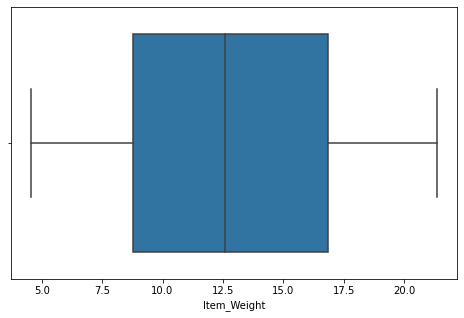

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=df)

__The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"__

In [9]:
# Imputing with Mean
df['Item_Weight']= df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [10]:
df['Item_Weight'].isnull().sum()

0

We have succesfully imputed the missing values from the column Item_Weight

__3.2 : Outlet Size__

In [11]:
df['Outlet_Size'].isnull().sum()

2410

In [12]:
print(df['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


__Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column__

In [13]:
#Imputing with Mode
df['Outlet_Size']= df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [14]:
df['Outlet_Size'].isnull().sum()

0

__We have succesfully imputed the missing values from the column Outlet_Size.__

### Step 4: Exploratory Data Analysis

In [15]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

__We see there are some irregularities in the column and it is needed to fix them.__

In [18]:
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [19]:
df['Item_Fat_Content']= df['Item_Fat_Content'].astype(str)

In [20]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

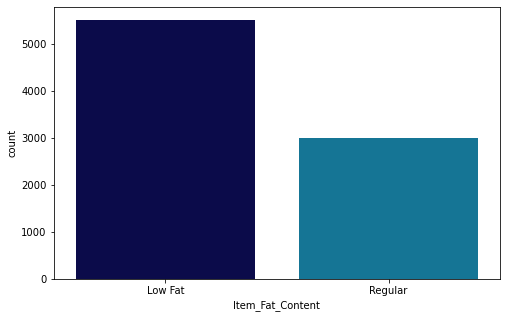

In [21]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=df,palette='ocean')

__The Items bought are more of Low Fat.__

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

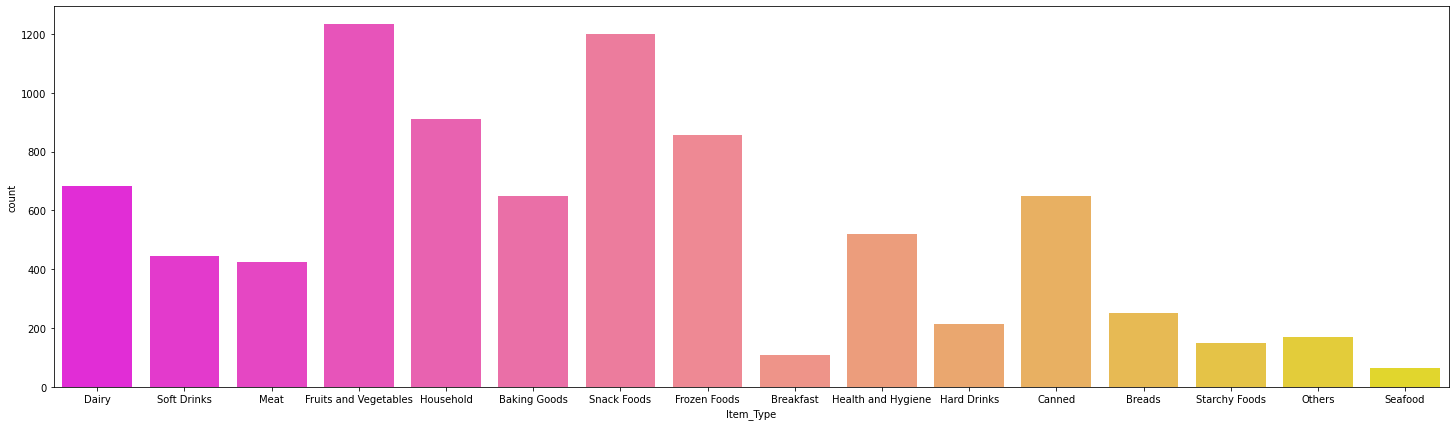

In [22]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=df,palette='spring')

* __Fruits and Vegetables are largely sold as people tend to use them on daily purpose.__
* __Snack Foods too have good sales.__

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

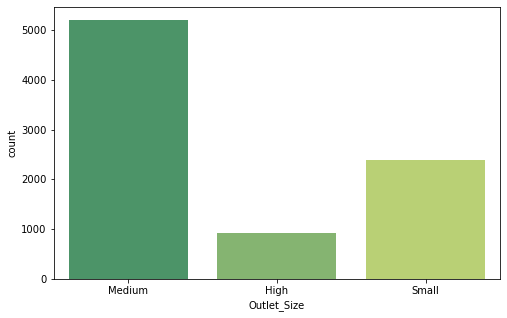

In [23]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=df,palette='summer')

* __The Outlets are more of Medium Size__

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

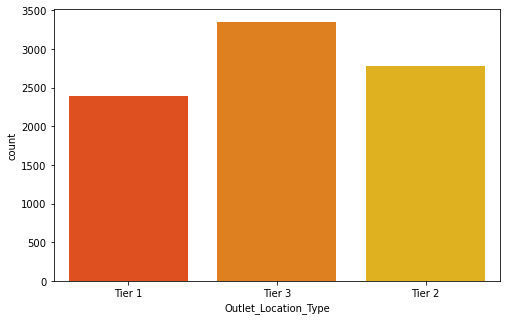

In [24]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=df,palette='autumn')

* __The Outlets are maximum in number in Tier 3 Cities__

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

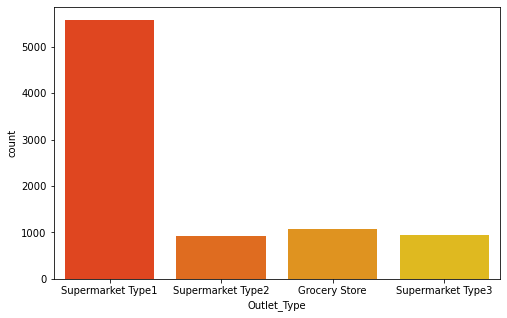

In [25]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=df,palette='autumn')

* __The Outlets are more of Supermarket Type1__

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

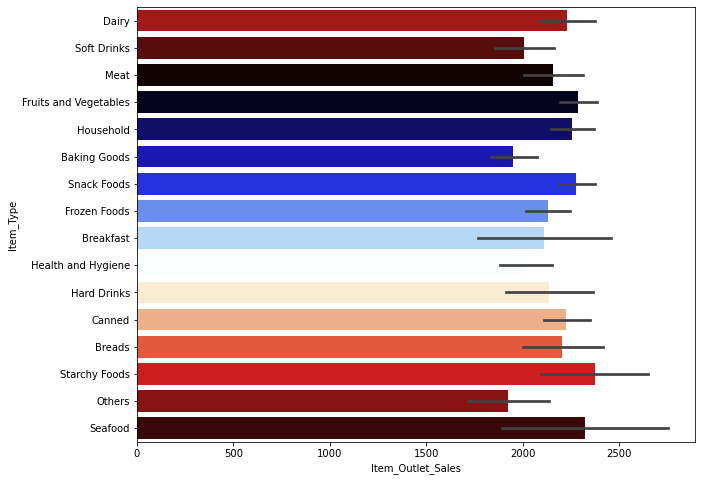

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df,palette='flag')

* __The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.__

### Step 5 : Feature Engineering

__Determine the years of operation of a store__

In [27]:
#Years:
df['Outlet_Years'] = 2022 - df['Outlet_Establishment_Year']
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


__Create a broad category of Type of Item__

In [28]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35,Non-Consumable


__Modify categories of Item_Fat_Content__

In [30]:
#Mark non-consumables as separate category in low_fat:
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

__Numerical and One-Hot Coding of Categorical variables__

In [31]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet_Identifier']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [32]:
df.shape

(8523, 14)

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,23,1
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,13,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,23,1
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,24,1
4,NCD19,8.93,1,0.000000,Household,53.8614,1,1987,0,2,1,994.7052,35,2


In [34]:
#One Hot Coding:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet_Identifier'])

In [35]:
df.shape

(8523, 34)

### Step 6: Building Model

In [36]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9'],
      dtype='object')

In [37]:
df = df.select_dtypes(exclude='object')

In [38]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,9.30,0.016047,249.8092,1999,3735.1380,23,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,2009,443.4228,13,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1999,2097.2700,23,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,1998,732.3800,24,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,35,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [39]:
# Seperate Features and Target
X= df.drop(columns = ['Item_Outlet_Sales'], axis=1)
y= df['Item_Outlet_Sales']

In [40]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [41]:
# Model Building
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()
coef

Item_Type_Combined_2        -1.056355e+16
Outlet_Identifier_8         -4.019093e+15
Outlet_Identifier_6         -3.246284e+15
Outlet_Type_0               -2.378371e+15
Outlet_Identifier_9         -2.152240e+15
Outlet_Identifier_4         -1.682221e+15
Outlet_Type_3               -1.657772e+15
Outlet_Identifier_7         -1.490968e+15
Outlet_Identifier_3         -1.443308e+15
Outlet_Identifier_2         -1.351547e+15
Outlet_Identifier_1         -9.546714e+14
Outlet_Size_0               -1.694495e+14
Outlet_Establishment_Year   -7.003638e+12
Item_Visibility             -4.028827e+02
Item_Weight                  2.286377e-01
Item_MRP                     1.555308e+01
Outlet_Years                 2.088047e+13
Outlet_Type_1                2.931103e+14
Outlet_Identifier_5          3.167369e+14
Outlet_Size_1                4.542567e+14
Outlet_Type_2                7.714915e+14
Item_Type_Combined_0         1.390664e+15
Item_Type_Combined_1         1.390664e+15
Outlet_Identifier_0          1.399

In [42]:
LR.score(X_train,y_train)

0.5686311771679082

In [43]:
LR.score(X_valid,y_valid)

0.5438151107010836

<AxesSubplot:>

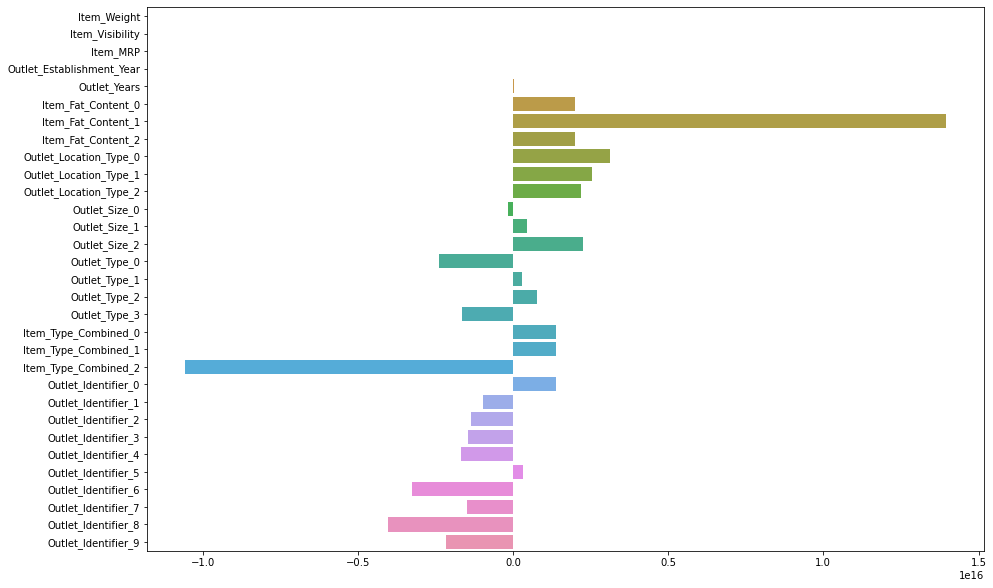

In [44]:
# Barplot for coefficients
plt.figure(figsize=(15,10))
sns.barplot(LR.coef_,features)

In [45]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_valid, 'Predicted value': y_pred})
mlr_diff.head()

,Actual value,Predicted value
6544,932.1200,1507.0
1877,1930.1542,2476.0
2933,3119.9388,3739.0
8116,71.9064,-1348.0
6240,2021.3688,1070.0


#### Evaluating the Model

In [46]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_valid, y_pred)
meanSqErr = metrics.mean_squared_error(y_valid, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_valid, y_pred))
print('R squared: {:.2f}'.format(LR.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 56.34
Mean Absolute Error: 878.9517056891495
Mean Square Error: 1409759.0634281174
Root Mean Square Error: 1187.3327517710095


__RMSE__

In [47]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1187.3327517710095


* __Validation Set RMSE score is around 1187 from this linear model__

In [48]:
# Seperate Features and Target
X= df.drop(columns = ['Item_Outlet_Sales'], axis=1)
y= df['Item_Outlet_Sales']

In [49]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     732.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        08:18:42   Log-Likelihood:                -71990.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8507   BIC:                         1.441e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Weight           

In [50]:
x=df.iloc[: ,0:4]
y= df['Item_Outlet_Sales']

In [51]:
import statsmodels.api as sm

model_ = sm.OLS(y, x).fit()
predictions_ = model_.predict(x) 

print_model = model_.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.749
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              6350.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):                        0.00
Time:                        08:18:42   Log-Likelihood:                         -73762.
No. Observations:                8523   AIC:                                  1.475e+05
Df Residuals:                    8519   BIC:                                  1.476e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------